#               **E-commerce customer segmentation**


# **Problem Statement**



As an e-commerce platform, it is very important to profile your customers, dividing your clientele base into groups based on their needs and expectations. Grouping will help us come up with dedicated marketing strategies and will aid us in recommending products to different user bases. In this project, we are interested in analyzing the content of an E-commerce database that lists purchases made by ∼4000 customers over a period of one year (1/12/2010 to 9/12/2011). Based on this analysis, we would like to develop models to group the 4000 customers into different buckets. Such a model must take into account the similarity between the products purchased between the users (i.e. a user might purchase 2 different products which are very similar to each other), the spending patterns of a user, their meta information, etc

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (18,10)
plt.rcParams['font.size'] = 12
pd.set_option("display.max_rows", None, "display.max_columns", None)
plt.rcParams['figure.dpi'] = 70
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("/content/E-Commercedata1.csv",encoding ='unicode_escape')
df

In [6]:
df.shape

(541909, 8)

In [7]:
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12-01-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12-01-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12-01-2010 08:26,3.39,17850.0,United Kingdom


In [8]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [9]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


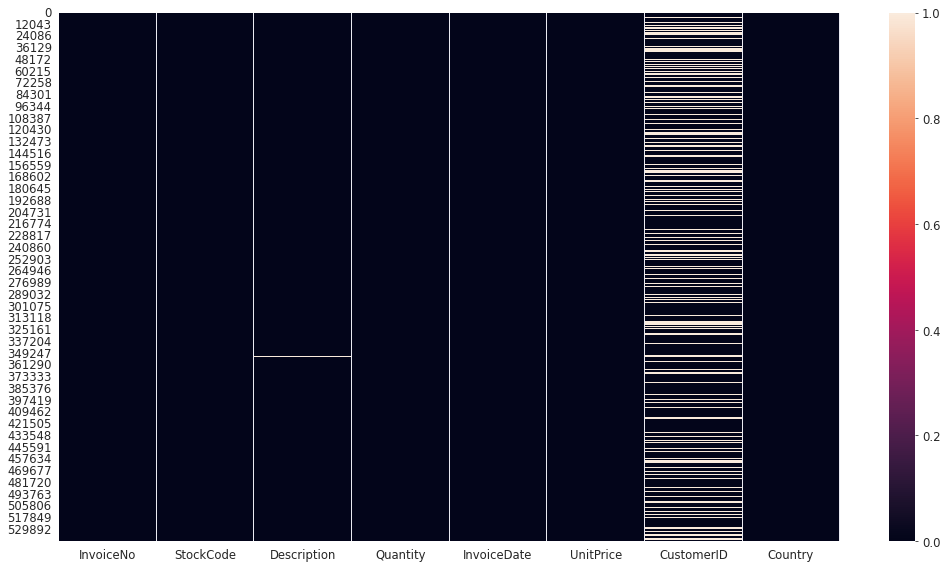

In [10]:
sns.heatmap(df.isnull())
plt.show()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [12]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [13]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

# Data Cleaning

# Invoice

Invoice Number has Unique transaction.

we are deleting the column From the entire data set.

In [14]:
df.drop(columns='InvoiceNo', inplace=True)

In [15]:
df.shape

(541909, 7)

# Stock Code

No Null Values in Stock Code 

In [16]:
df.StockCode.isnull().sum()

0

In [17]:
df.StockCode.value_counts()

85123A          2313
22423           2203
85099B          2159
47566           1727
20725           1639
84879           1502
22720           1477
22197           1476
21212           1385
20727           1350
22383           1348
22457           1280
23203           1267
POST            1256
22386           1251
22469           1239
22960           1229
21931           1214
22086           1210
22411           1202
20728           1197
22382           1192
22961           1182
22666           1180
23298           1179
22699           1138
22384           1137
23209           1135
82482           1129
22993           1111
22727           1107
22697           1085
23206           1084
22178           1072
20724           1068
23084           1067
20726           1061
22726           1026
21080           1015
23199           1009
22139            993
22077            986
22138            974
21034            967
22470            963
85099C           960
84946            946
21790        

# Description

In [18]:
df.Description.isnull().sum()

1454

% of Description 

In [19]:
df.Description.isnull().sum()/df.shape[0]*100

0.2683107311375157

In [20]:
df.Description.value_counts()

WHITE HANGING HEART T-LIGHT HOLDER     2369
REGENCY CAKESTAND 3 TIER               2200
JUMBO BAG RED RETROSPOT                2159
PARTY BUNTING                          1727
LUNCH BAG RED RETROSPOT                1638
ASSORTED COLOUR BIRD ORNAMENT          1501
SET OF 3 CAKE TINS PANTRY DESIGN       1473
PACK OF 72 RETROSPOT CAKE CASES        1385
LUNCH BAG  BLACK SKULL.                1350
NATURAL SLATE HEART CHALKBOARD         1280
POSTAGE                                1252
JUMBO BAG PINK POLKADOT                1251
HEART OF WICKER SMALL                  1237
JAM MAKING SET WITH JARS               1229
JUMBO STORAGE BAG SUKI                 1214
PAPER CHAIN KIT 50'S CHRISTMAS         1210
JUMBO SHOPPER VINTAGE RED PAISLEY      1202
LUNCH BAG CARS BLUE                    1197
LUNCH BAG SPACEBOY DESIGN              1192
JAM MAKING SET PRINTED                 1182
RECIPE BOX PANTRY YELLOW DESIGN        1180
SPOTTY BUNTING                         1172
LUNCH BAG SUKI DESIGN           

In [21]:
df.Description.nunique()

4223

# Quantity

In [22]:
df.Quantity.isnull().sum()

0

In [23]:
df.Quantity.dtypes

dtype('int64')

# Invoice Date

We are just converting it into date and time order.

In [24]:
df['InvoiceDate']=pd.to_datetime(df.InvoiceDate)
df['InvoiceDate'].head()

0   2010-12-01 08:26:00
1   2010-12-01 08:26:00
2   2010-12-01 08:26:00
3   2010-12-01 08:26:00
4   2010-12-01 08:26:00
Name: InvoiceDate, dtype: datetime64[ns]

In [25]:
df['InvoiceDate'] = df.InvoiceDate.dt.strftime('%d/%m/%Y')

In [26]:
df['InvoiceDate'].head(5)

0    01/12/2010
1    01/12/2010
2    01/12/2010
3    01/12/2010
4    01/12/2010
Name: InvoiceDate, dtype: object

# Unit Price

In [27]:
df.UnitPrice.isnull().sum()

0

# Customer ID

In [28]:
df.CustomerID.isnull().sum()

135080

In [29]:
df.CustomerID.isnull().sum()/df.shape[0]*100

24.926694334288598

In [30]:
# I will have to drop the missing values/rows from the CustomerID
df.dropna(axis = 0, subset = ['CustomerID'], inplace = True)
print('Dataframe dimensions:', df.shape)

Dataframe dimensions: (406829, 7)


**Unique customer Id **

In [31]:
len(df['CustomerID'].value_counts())

4372

# Country

In [32]:
df.Country.isnull().sum()

0

In [33]:
df.Country.unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Saudi Arabia', 'Czech Republic', 'Canada',
       'Unspecified', 'Brazil', 'USA', 'European Community', 'Bahrain',
       'Malta', 'RSA'], dtype=object)

In [34]:
countries = df['Country'].value_counts()

In [35]:
countries

United Kingdom          361878
Germany                   9495
France                    8491
EIRE                      7485
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               1877
Portugal                  1480
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
USA                        291
Israel                     250
Unspecified                244
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon                     45
Lithuani

Just for Grouping the Two important Feature for Identification.

In [36]:
temp_cou = df[['CustomerID', 'Country']].groupby(['CustomerID', 'Country']).count()
temp_cou.head(4)

,
CustomerID,Country
12346.0,United Kingdom
12347.0,Iceland
12348.0,Finland
12349.0,Italy


In [37]:
df=df[~df.Description.duplicated()]

In [38]:
df=df[~df.Description.isnull()]

In [39]:
df.shape

(3896, 7)

# **NLP** 

In [40]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Removing punctuation (.!<>{}’,”(/)-)

In [41]:
df['Description']

0          WHITE HANGING HEART T-LIGHT HOLDER
1                         WHITE METAL LANTERN
2              CREAM CUPID HEARTS COAT HANGER
3         KNITTED UNION FLAG HOT WATER BOTTLE
4              RED WOOLLY HOTTIE WHITE HEART.
5                SET 7 BABUSHKA NESTING BOXES
6           GLASS STAR FROSTED T-LIGHT HOLDER
7                      HAND WARMER UNION JACK
8                   HAND WARMER RED POLKA DOT
9               ASSORTED COLOUR BIRD ORNAMENT
10                 POPPY'S PLAYHOUSE BEDROOM 
11                  POPPY'S PLAYHOUSE KITCHEN
12          FELTCRAFT PRINCESS CHARLOTTE DOLL
13                    IVORY KNITTED MUG COSY 
14         BOX OF 6 ASSORTED COLOUR TEASPOONS
15              BOX OF VINTAGE JIGSAW BLOCKS 
16             BOX OF VINTAGE ALPHABET BLOCKS
17                   HOME BUILDING BLOCK WORD
18                   LOVE BUILDING BLOCK WORD
19                RECIPE BOX WITH METAL HEART
20                        DOORMAT NEW ENGLAND
21                   JAM MAKING SE

In [42]:
df['Description'] = df['Description'].str.replace("[^a-zA-Z0-9]", " ")

In [43]:
df['Description'].head(4)

0     WHITE HANGING HEART T LIGHT HOLDER
1                    WHITE METAL LANTERN
2         CREAM CUPID HEARTS COAT HANGER
3    KNITTED UNION FLAG HOT WATER BOTTLE
Name: Description, dtype: object

# Replacing short words

In [44]:
df["Description"] = df["Description"].apply(lambda row: ' '.join([word for word in row.split() if len(word)>2]))
df["Description"]

0            WHITE HANGING HEART LIGHT HOLDER
1                         WHITE METAL LANTERN
2              CREAM CUPID HEARTS COAT HANGER
3         KNITTED UNION FLAG HOT WATER BOTTLE
4               RED WOOLLY HOTTIE WHITE HEART
5                  SET BABUSHKA NESTING BOXES
6             GLASS STAR FROSTED LIGHT HOLDER
7                      HAND WARMER UNION JACK
8                   HAND WARMER RED POLKA DOT
9               ASSORTED COLOUR BIRD ORNAMENT
10                    POPPY PLAYHOUSE BEDROOM
11                    POPPY PLAYHOUSE KITCHEN
12          FELTCRAFT PRINCESS CHARLOTTE DOLL
13                     IVORY KNITTED MUG COSY
14              BOX ASSORTED COLOUR TEASPOONS
15                  BOX VINTAGE JIGSAW BLOCKS
16                BOX VINTAGE ALPHABET BLOCKS
17                   HOME BUILDING BLOCK WORD
18                   LOVE BUILDING BLOCK WORD
19                RECIPE BOX WITH METAL HEART
20                        DOORMAT NEW ENGLAND
21                   JAM MAKING SE

# LowerCase character

In [45]:
df['Description']=df['Description'].str.lower()

In [46]:
df['Description']

0            white hanging heart light holder
1                         white metal lantern
2              cream cupid hearts coat hanger
3         knitted union flag hot water bottle
4               red woolly hottie white heart
5                  set babushka nesting boxes
6             glass star frosted light holder
7                      hand warmer union jack
8                   hand warmer red polka dot
9               assorted colour bird ornament
10                    poppy playhouse bedroom
11                    poppy playhouse kitchen
12          feltcraft princess charlotte doll
13                     ivory knitted mug cosy
14              box assorted colour teaspoons
15                  box vintage jigsaw blocks
16                box vintage alphabet blocks
17                   home building block word
18                   love building block word
19                recipe box with metal heart
20                        doormat new england
21                   jam making se

# Remove stop words

In [47]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk import word_tokenize

stop_words = stopwords.words('english')

# Making custom list of words to be removed 
add_words = ['childrens','circus','girls','boys']

# Adding to the list of words
stop_words.extend(add_words)

# Function to remove stop words 
def remove_stopwords(rev):
    # iNPUT : IT WILL TAKE ROW/REVIEW AS AN INPUT
    # take the paragraph, break into words, check if the word is a stop word, remove if stop word, combine the words into a para again
    review_tokenized = word_tokenize(rev)
    rev_new = " ".join([i for i in review_tokenized  if i not in stop_words])
    return rev_new

# Removing stopwords
#df['Description'] = [remove_stopwords(r) for r in df1['Description']]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [48]:
# Removing stopwords
df['Description'] = [remove_stopwords(r) for r in df['Description']]

# Lemmatization

In [49]:
# Begin Lemmatization 
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# function to convert nltk tag to wordnet tag
lemmatizer = WordNetLemmatizer()

# Finds the part of speech tag
# Convert the detailed POS tag into a shallow information
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None

# lemmatize sentence using pos tag
def lemmatize_sentence(sentence):
  # word tokenize -> pos tag (detailed) -> wordnet tag (shallow pos) -> lemmatizer -> root word
    #tokenize the sentence and find the POS tag for each token
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))  
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            #if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
        else:        
            #else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)


df['Description'] = df['Description'].apply(lambda x: lemmatize_sentence(x))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


# Plotting Freqent Words

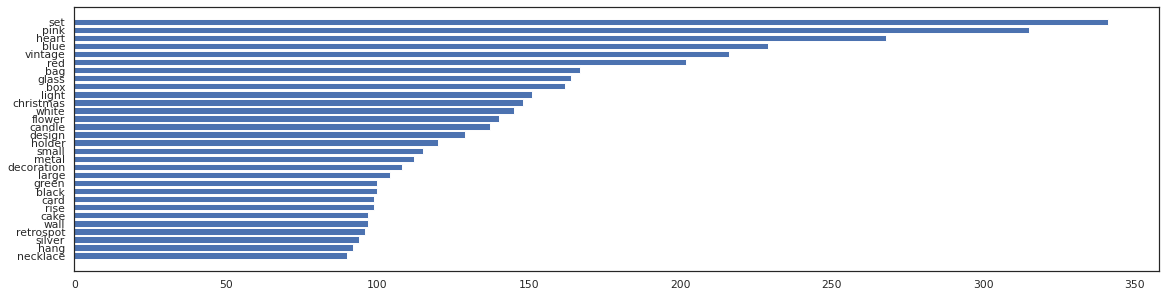

In [50]:
# Plotting most frequent words from positive reviews using bar chart

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'white')
from nltk import FreqDist #function to find the frequent words in the data

# function to find the frequent words in the data
from nltk import FreqDist 

#Extracts words into list and count frequency
all_words = ' '.join([text for text in df['Description']])
all_words = all_words.split()
words_df = FreqDist(all_words)


# Extracting words and frequency from words_df object
words_df = pd.DataFrame({'word':list(words_df.keys()), 'count':list(words_df.values())})

# Subsets top 30 words by frequency
words_df = words_df.nlargest(columns="count", n = 30) 

words_df.sort_values('count', inplace = True)

# Plotting 30 frequent words
plt.figure(figsize=(20,5))
ax = plt.barh(words_df['word'], width = words_df['count'])

plt.show()

# WordCloud

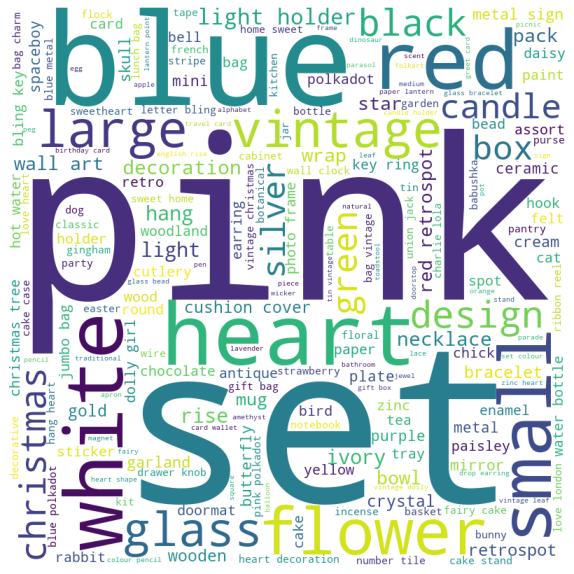

In [51]:
# Bilding a Word Cloud

from wordcloud import WordCloud
all_words = ' '.join([text for text in df['Description']])
 

wordcloud = WordCloud(width = 800, height = 800, 
                      background_color ='white', 
                      min_font_size = 10).generate(all_words)

#plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

# Bag of Words Model

In [52]:
# Importing module
from sklearn.feature_extraction.text import TfidfVectorizer

In [53]:
tfidf_vectorizer = TfidfVectorizer(max_features=2500) # Intialise the model 
values = tfidf_vectorizer.fit_transform(df['Description'])

# Show the Model as a pandas DataFrame
feature_names = tfidf_vectorizer.get_feature_names()
df1 = pd.DataFrame(values.toarray(), columns = feature_names)

In [54]:
df_NLP = df.join(df1)
df_NLP.shape

(3896, 1757)

In [55]:
df_NLP.head()

StockCode                       Description  Quantity InvoiceDate  \
0    85123A     white hang heart light holder         6  01/12/2010   
1     71053               white metal lantern         6  01/12/2010   
2    84406B     cream cupid heart coat hanger         8  01/12/2010   
3    84029G  knit union flag hot water bottle         6  01/12/2010   
4    84029E     red woolly hottie white heart         6  01/12/2010   

   UnitPrice  CustomerID         Country  120cm  125g  15c  15cm  16x16cm  \
0       2.55     17850.0  United Kingdom    0.0   0.0  0.0   0.0      0.0   
1       3.39     17850.0  United Kingdom    0.0   0.0  0.0   0.0      0.0   
2       2.75     17850.0  United Kingdom    0.0   0.0  0.0   0.0      0.0   
3       3.39     17850.0  United Kingdom    0.0   0.0  0.0   0.0      0.0   
4       3.39     17850.0  United Kingdom    0.0   0.0  0.0   0.0      0.0   

   17080  18pc  200  20light  250g  25w  25x24x12cm  30cm  30cmx30cm  34x20cm  \
0    0.0   0.0  0.0      0.0   0.0  0.0         0.0   0.0        0.0      0.0   
1    0.0   0.0  0.0      0.0   0.0  0.0         0.0   0.0        0.0      0.0   
2    0.0   0.0  0.0      0.0   0.0  0.0         0.0   0.0        0.0      0.0   
3    0.0   0.0  0.0      0.0   0.0  0.0         0.0   0.0        0.0      0.0   
4    0.0   0.0  0.0      0.0   0.0  0.0         0.0   0.0        0.0      0.0   

   40cm  40x40cm  45cm  45x30cm  45x45cm  500g  50cm  60cm  60x40cm  \
0   0.0      0.0   0.0      0.0      0.0   0.0   0.0   0.0      0.0   
1   0.0      0.0   0.0      0.0      0.0   0.0   0.0   0.0      0.0   
2   0.0      0.0   0.0      0.0      0.0   0.0   0.0   0.0      0.0   
3   0.0      0.0   0.0      0.0      0.0   0.0   0.0   0.0      0.0   
4   0.0      0.0   0.0      0.0      0.0   0.0   0.0   0.0      0.0   

   65cmx65cm  6pc  abc  abstract  acapulco  account  acrylic  address  ade  \
0        0.0  0.0  0.0       0.0       0.0      0.0      0.0      0.0  0.0   
1        0.0  0.0  0.0       0.0       0.0      0.0      0.0      0.0  0.0   
2        0.0  0.0  0.0       0.0       0.0      0.0      0.0      0.0  0.0   
3        0.0  0.0  0.0       0.0       0.0      0.0      0.0      0.0  0.0   
4        0.0  0.0  0.0       0.0       0.0      0.0      0.0      0.0  0.0   

   adult  advent  afghan  age  ahoy  aid  air  airline  airmail  alarm  album  \
0    0.0     0.0     0.0  0.0   0.0  0.0  0.0      0.0      0.0    0.0    0.0   
1    0.0     0.0     0.0  0.0   0.0  0.0  0.0      0.0      0.0    0.0    0.0   
2    0.0     0.0     0.0  0.0   0.0  0.0  0.0      0.0      0.0    0.0    0.0   
3    0.0     0.0     0.0  0.0   0.0  0.0  0.0      0.0      0.0    0.0    0.0   
4    0.0     0.0     0.0  0.0   0.0  0.0  0.0      0.0      0.0    0.0    0.0   

   allium  alphabet  alpine  aluminium  amber  amelie  amethyst  anemone  \
0     0.0       0.0     0.0        0.0    0.0     0.0       0.0      0.0   
1     0.0       0.0     0.0        0.0    0.0     0.0       0.0      0.0   
2     0.0       0.0     0.0        0.0    0.0     0.0       0.0      0.0   
3     0.0       0.0     0.0        0.0    0.0     0.0       0.0      0.0   
4     0.0       0.0     0.0        0.0    0.0     0.0       0.0      0.0   

   angel  animal  ant  antique  antoienett  antoinette  aperitif  apothecary  \
0    0.0     0.0  0.0      0.0         0.0         0.0       0.0         0.0   
1    0.0     0.0  0.0      0.0         0.0         0.0       0.0         0.0   
2    0.0     0.0  0.0      0.0         0.0         0.0       0.0         0.0   
3    0.0     0.0  0.0      0.0         0.0         0.0       0.0         0.0   
4    0.0     0.0  0.0      0.0         0.0         0.0       0.0         0.0   

   apple  apron  aqua  area  army  art  articulate  artificial  artiifcial  \
0    0.0    0.0   0.0   0.0   0.0  0.0         0.0         0.0         0.0   
1    0.0    0.0   0.0   0.0   0.0  0.0         0.0         0.0         0.0   
2    0.0    0.0   0.0   0.0   0.0  0.0         0.0         0.0        

In [56]:
df_NLP.drop(columns='Description',inplace=True)

In [57]:

df_NLP.drop(columns=['StockCode','InvoiceDate','Country'],axis=1,inplace=True)

In [70]:
df_NLP.shape

(3896, 1753)

In [59]:
df_NLP.fillna(0,inplace=True)

In [60]:
df_NLP.head()

Quantity  UnitPrice  CustomerID  120cm  125g  15c  15cm  16x16cm  17080  \
0         6       2.55     17850.0    0.0   0.0  0.0   0.0      0.0    0.0   
1         6       3.39     17850.0    0.0   0.0  0.0   0.0      0.0    0.0   
2         8       2.75     17850.0    0.0   0.0  0.0   0.0      0.0    0.0   
3         6       3.39     17850.0    0.0   0.0  0.0   0.0      0.0    0.0   
4         6       3.39     17850.0    0.0   0.0  0.0   0.0      0.0    0.0   

   18pc  200  20light  250g  25w  25x24x12cm  30cm  30cmx30cm  34x20cm  40cm  \
0   0.0  0.0      0.0   0.0  0.0         0.0   0.0        0.0      0.0   0.0   
1   0.0  0.0      0.0   0.0  0.0         0.0   0.0        0.0      0.0   0.0   
2   0.0  0.0      0.0   0.0  0.0         0.0   0.0        0.0      0.0   0.0   
3   0.0  0.0      0.0   0.0  0.0         0.0   0.0        0.0      0.0   0.0   
4   0.0  0.0      0.0   0.0  0.0         0.0   0.0        0.0      0.0   0.0   

   40x40cm  45cm  45x30cm  45x45cm  500g  50cm  60cm  60x40cm  65cmx65cm  6pc  \
0      0.0   0.0      0.0      0.0   0.0   0.0   0.0      0.0        0.0  0.0   
1      0.0   0.0      0.0      0.0   0.0   0.0   0.0      0.0        0.0  0.0   
2      0.0   0.0      0.0      0.0   0.0   0.0   0.0      0.0        0.0  0.0   
3      0.0   0.0      0.0      0.0   0.0   0.0   0.0      0.0        0.0  0.0   
4      0.0   0.0      0.0      0.0   0.0   0.0   0.0      0.0        0.0  0.0   

   abc  abstract  acapulco  account  acrylic  address  ade  adult  advent  \
0  0.0       0.0       0.0      0.0      0.0      0.0  0.0    0.0     0.0   
1  0.0       0.0       0.0      0.0      0.0      0.0  0.0    0.0     0.0   
2  0.0       0.0       0.0      0.0      0.0      0.0  0.0    0.0     0.0   
3  0.0       0.0       0.0      0.0      0.0      0.0  0.0    0.0     0.0   
4  0.0       0.0       0.0      0.0      0.0      0.0  0.0    0.0     0.0   

   afghan  age  ahoy  aid  air  airline  airmail  alarm  album  allium  \
0     0.0  0.0   0.0  0.0  0.0      0.0      0.0    0.0    0.0     0.0   
1     0.0  0.0   0.0  0.0  0.0      0.0      0.0    0.0    0.0     0.0   
2     0.0  0.0   0.0  0.0  0.0      0.0      0.0    0.0    0.0     0.0   
3     0.0  0.0   0.0  0.0  0.0      0.0      0.0    0.0    0.0     0.0   
4     0.0  0.0   0.0  0.0  0.0      0.0      0.0    0.0    0.0     0.0   

   alphabet  alpine  aluminium  amber  amelie  amethyst  anemone  angel  \
0       0.0     0.0        0.0    0.0     0.0       0.0      0.0    0.0   
1       0.0     0.0        0.0    0.0     0.0       0.0      0.0    0.0   
2       0.0     0.0        0.0    0.0     0.0       0.0      0.0    0.0   
3       0.0     0.0        0.0    0.0     0.0       0.0      0.0    0.0   
4       0.0     0.0        0.0    0.0     0.0       0.0      0.0    0.0   

   animal  ant  antique  antoienett  antoinette  aperitif  apothecary  apple  \
0     0.0  0.0      0.0         0.0         0.0       0.0         0.0    0.0   
1     0.0  0.0      0.0         0.0         0.0       0.0         0.0    0.0   
2     0.0  0.0      0.0         0.0         0.0       0.0         0.0    0.0   
3     0.0  0.0      0.0         0.0         0.0       0.0         0.0    0.0   
4     0.0  0.0      0.0         0.0         0.0       0.0         0.0    0.0   

   apron  aqua  area  army  art  articulate  artificial  artiifcial   as  \
0    0.0   0.0   0.0   0.0  0.0         0.0         0.0         0.0  0.0   
1    0.0   0.0   0.0   0.0  0.0         0.0         0.0         0.0  0.0   
2    0.0   0.0   0.0   0.0  0.0         0.0         0.0         0.0  0.0   
3    0.0   0.0   0.0   0.0  0.0         0.0         0.0         0.0  0.0   
4    0.0   0.0   0.0   0.0  0.0         0.0         0.0         0.0  0.0   

   ashtray  assort  assorted  asst  asstd  azure  babushka  baby  back  \
0      0.0     0.0       0.0   0.0    0.0    0.0       0.0   0.0   0.0   
1      0.0     0.0       0.0   0.0    0.0    0.0       0.0   0.0   0.0   
2      0.0     0.0       0.0   0.0    0.0    0.

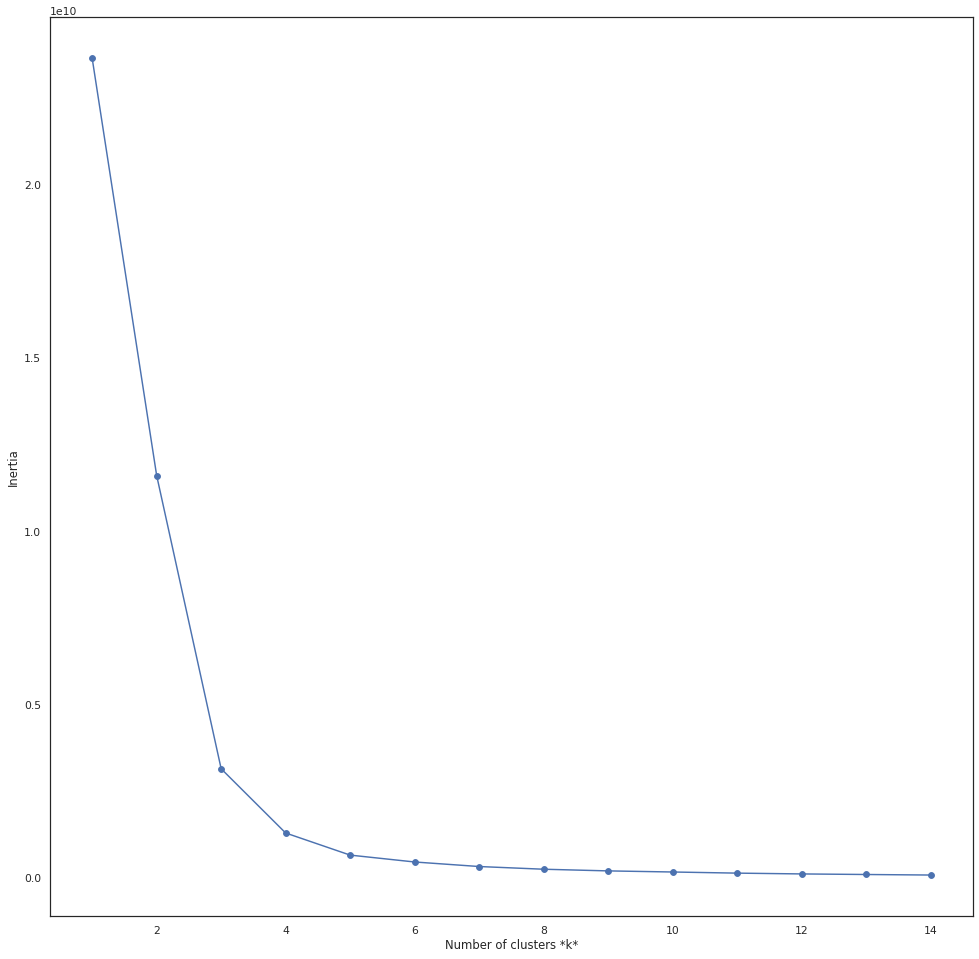

In [73]:
# Elbow plot
# We make a plot between k value and inertia

# store inertia for all values of k 
inertias = []  
list_k = list(range(1, 15))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(df_NLP)
    inertias.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(17, 17))
plt.plot(list_k, inertias, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Inertia');

# scaling

In [61]:
# scaling

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_std = scaler.fit_transform(df_NLP)

# Elbow plot

In [62]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the dat
X_std=df_NLP

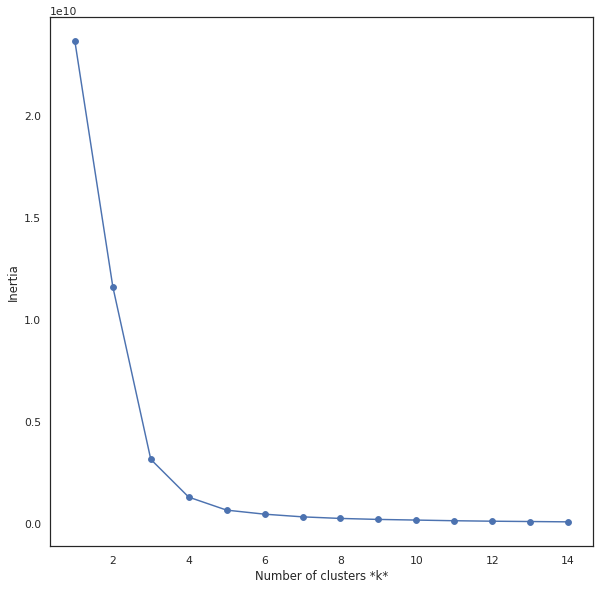

In [63]:
# Elbow plot
# We make a plot between k value and inertia

# store inertia for all values of k 
inertias = []  
list_k = list(range(1, 15))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(X_std)
    inertias.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(10, 10))
plt.plot(list_k, inertias, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Inertia');

# **number of clusters is 4**

In [64]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=4) 
km.fit(X_std)

KMeans(n_clusters=4)

In [65]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=4) # applying k = ?
km.fit(X_std) # fit the data - identify pattern, does everything

centroids = km.cluster_centers_ # final centroid points
centroids
km.labels_ # measures how tight my groups are. 
km.inertia_

1289787255.2138946

In [66]:
centroids

array([[1.01709677e+01, 3.47516129e+00, 1.75329258e+04, ...,
        4.32253474e-04, 1.57209315e-18, 2.34033566e-03],
       [1.17557302e+01, 3.94290766e+00, 1.53513170e+04, ...,
        1.98200931e-03, 4.37351547e-04, 2.26591358e-03],
       [7.76050000e+04, 1.56000000e+00, 1.43960000e+04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.76619343e+01, 3.83846584e+00, 1.33609059e+04, ...,
        3.43255691e-04, 1.21972744e-18, 7.97360777e-04]])

In [67]:
km.labels_

array([0, 0, 0, ..., 0, 0, 2], dtype=int32)

In [68]:
km.inertia_

1289787255.2138946